In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib
from matplotlib import pylab as plt


import pandas as pd
from sklearn.model_selection import train_test_split 


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Loading data
df = pd.read_csv('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/Project/Data/data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head(10) # shows the first 10 rows 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape # the shape of dataframe (number of rows, number of columns)

(303, 14)

In [5]:
df.shape[0]# number of rows

303

In [6]:
df.shape[1]# number of columns

14

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [10]:
df[(df['chol']>200)&(df['age']<35)].head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


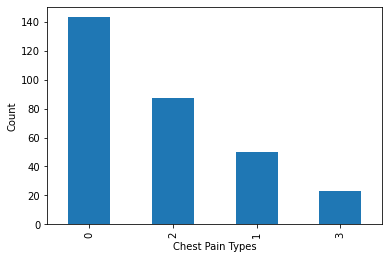

In [11]:
pd.value_counts(df['cp']).plot.bar()
plt.ylabel('Count')
plt.xlabel('Chest Pain Types')
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig1.png')
plt.show()

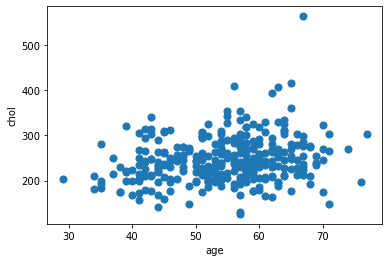

In [12]:
df.plot.scatter('age','chol',alpha=1,s=50)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig2.png')
plt.show()

In [13]:
count_matrix = df.groupby(['target', 'sex']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

sex            0         1
target                    
0       0.173913  0.826087
1       0.436364  0.563636


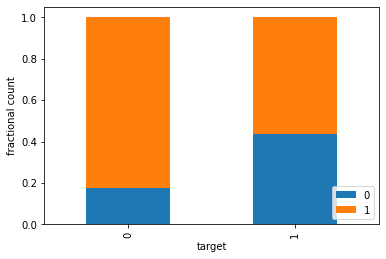

In [14]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fractional count')
plt.legend(loc=4)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig3.png')
plt.show()

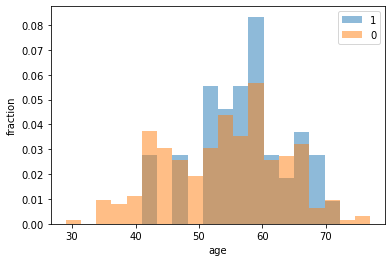

In [15]:
import matplotlib
from matplotlib import pylab as plt

categories = df['fbs'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['fbs']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('age')
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig4.png')
plt.show()

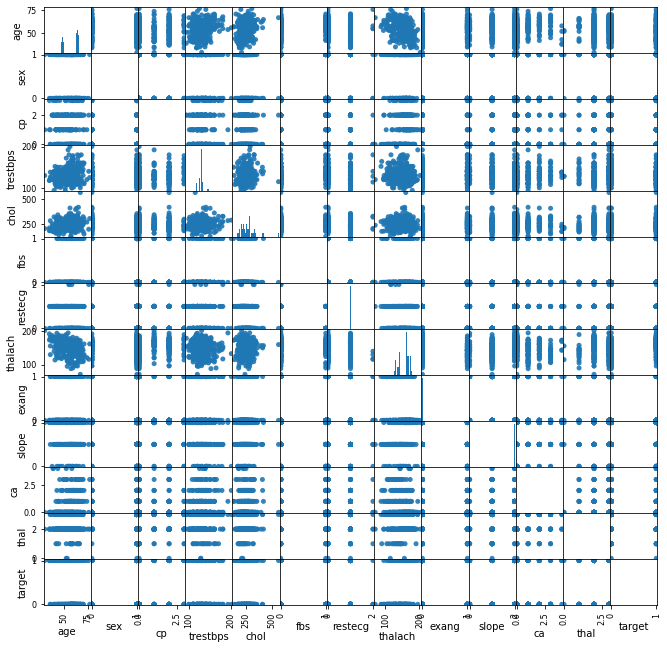

In [16]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(11, 11),hist_kwds={'bins': 300}, 
                           s=100, alpha=0.9)
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig5.png')
plt.show()

In [17]:
y = df['target'] # target variable
X = df.loc[:, df.columns != 'target'] # all other columns are features
print(y)
print(X.head())

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [18]:
ftr_names = X.columns
feature_names = X.columns

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Creating ML Pipeline
def ML_pipeline(X,y,random_state,n_folds,param_grid,algo):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
    cont_ftrs = ['age','trestbps','chol','thalach','oldpeak']
    # ordinal encoder
    categorical_transformer = Pipeline(steps=[
        ('ord', OrdinalEncoder(handle_unknown='ignore'))])
    # minmax scaler
    numeric_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    
    pipe = Pipeline(steps=[('preprocessor',preprocessor),('algo',algo)])
    # the parameter(s) we want to tune
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10,scoring='accuracy')
    grid.fit(X_other, y_other)
    
    print("Best Train Score: ")
    print(grid.best_score_)
    print("Best Test Score: ") 
    print(grid.score(X_test,y_test))
    print("Best model parameters: ")
    print(grid.best_params_)
    
    return grid, X_test, y_test

SVC 

In [21]:
#SVC 
best_models = []
best_accuracy = []
best_model_final=[]
best_acc_final=[]
best_random = []
baseline_sd=[]
for i in range(3):
    param_grid = {'algo__C': [0.001, 0.01, 1, 10, 100],
                    'algo__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "algo__probability":[True],
                 "algo__kernel":['linear']}
    grid, X_test, y_test = ML_pipeline(X,y,42+i,3,param_grid,SVC(random_state=42+i,probability=True))
    best_models.append(grid.best_params_)
    best_accuracy.append(grid.score(X_test,y_test))
    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])
    baseline_sd.append(np.sum(y_test == 0)/len(y_test))
    test_score = grid.score(X_test,y_test)
    print('test score = ',test_score)
    print('test baseline = ',np.sum(y_test == 0)/len(y_test))


print('Final Standard deviation ',np.std(best_accuracy))
print('Baseline Standard deviation',np.std(baseline_sd))
    
best_acc_final.append(np.max(best_accuracy))
best_model_final.append(best_models[np.argmax(best_accuracy)])
best_random.append(np.argmax(best_accuracy))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Train Score: 
0.8059670781893004
Best Test Score: 
0.8688524590163934
Best model parameters: 
{'algo__C': 1, 'algo__gamma': 0.001, 'algo__kernel': 'linear', 'algo__probability': True}
test score =  0.8688524590163934
test baseline =  0.47540983606557374
Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Train Score: 
0.813940329218107
Best Test Score: 
0.819672131147541
Best model parameters: 
{'algo__C': 0.01, 'algo__gamma': 0.001, 'algo__kernel': 'linear', 'algo__probability': True}
test score =  0.819672131147541
test baseline =  0.45901639344262296
Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Train Score: 
0.8347222222222221
Best Test Score: 
0.8524590163934426
Best model parameters: 
{'algo__C': 10, 'algo__gamma': 0.001, 'algo__kernel': 'linear', 'algo__probability': True}
test score =  0.8524590163934426
test baseline =  0.45901639344262296
Final Standard deviation  0.02044621

RANDOM FOREST

In [22]:
#Random Forest
best_models = []
best_accuracy = []
baseline_sd=[]

for i in range(3):
    
    param_grid = {
    'algo__max_depth': [1, 10, 15, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
    'algo__max_features': [0.5,0.75,1.0], # linearly spaced between 0.5 and 1
    'algo__n_estimators': [10,50,100, 200, 300, 1000]
    }

    grid, X_test, y_test = ML_pipeline(X,y,42+i,3,param_grid,RandomForestClassifier(random_state=42+i))
    best_models.append(grid.best_params_)
    best_accuracy.append(grid.score(X_test,y_test))
    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])
    baseline_sd.append(np.sum(y_test == 0)/len(y_test))
    test_score = grid.score(X_test,y_test)
    print('test score = ',test_score)
    print('test baseline = ',np.sum(y_test == 0)/len(y_test))


print('Final Standard deviation ',np.std(best_accuracy))
print('Baseline Standard deviation',np.std(baseline_sd))
    
best_acc_final.append(np.max(best_accuracy))
best_model_final.append(best_models[np.argmax(best_accuracy)])
best_random.append(np.argmax(best_accuracy))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Train Score: 
0.8101851851851851
Best Test Score: 
0.8360655737704918
Best model parameters: 
{'algo__max_depth': 10, 'algo__max_features': 0.75, 'algo__n_estimators': 100}
test score =  0.8360655737704918
test baseline =  0.47540983606557374
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Train Score: 
0.8099279835390947
Best Test Score: 
0.7377049180327869
Best model parameters: 
{'algo__max_depth': 1, 'algo__max_features': 0.5, 'algo__n_estimators': 10}
test score =  0.7377049180327869
test baseline =  0.45901639344262296
Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best Train Score: 
0.8182098765432099
Best Test Score: 
0.819672131147541
Best model parameters: 
{'algo__max_depth': 10, 'algo__max_features': 0.5, 'algo__n_estimators': 200}
test score =  0.819672131147541
test baseline =  0.45901639344262296
Final Standard deviation  0.04302736543175853
Baseline Standard deviation 0.

KNN

In [23]:
#Kneighbors
baseline_sd=[]
best_models = []
best_accuracy = []

for i in range(3):
    
    param_grid = {'algo__n_neighbors':[1,2],
                 'algo__leaf_size': [1,2,3]}
    grid, X_test, y_test = ML_pipeline(X,y,42+i,3,param_grid,KNeighborsClassifier())
    best_models.append(grid.best_params_)
    best_accuracy.append(grid.score(X_test,y_test))
    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])
    baseline_sd.append(np.sum(y_test == 0)/len(y_test))
    test_score = grid.score(X_test,y_test)
    print('test score = ',test_score)
    print('test baseline = ',np.sum(y_test == 0)/len(y_test))


print('Final Standard deviation ',np.std(best_accuracy))
print('Baseline Standard deviation',np.std(baseline_sd))
    
best_acc_final.append(np.max(best_accuracy))
best_model_final.append(best_models[np.argmax(best_accuracy)])
best_random.append(np.argmax(best_accuracy))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Train Score: 
0.7851337448559671
Best Test Score: 
0.819672131147541
Best model parameters: 
{'algo__leaf_size': 1, 'algo__n_neighbors': 1}
test score =  0.819672131147541
test baseline =  0.47540983606557374
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Train Score: 
0.7686213991769547
Best Test Score: 
0.819672131147541
Best model parameters: 
{'algo__leaf_size': 1, 'algo__n_neighbors': 1}
test score =  0.819672131147541
test baseline =  0.45901639344262296
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Train Score: 
0.7728395061728396
Best Test Score: 
0.7704918032786885
Best model parameters: 
{'algo__leaf_size': 1, 'algo__n_neighbors': 1}
test score =  0.7704918032786885
test baseline =  0.45901639344262296
Final Standard deviation  0.023183828891362238
Baseline Standard deviation 0.0077279429637873865


DT

In [24]:
#Decision tree
baseline_sd=[]
best_models = []
best_accuracy = []
for i in range(3):
    param_grid = {"algo__criterion": ["gini", "entropy"],
                  "algo__min_samples_split": [2,4,6,8],
                  "algo__max_depth": [1, 5, 10, 15]
                  }
    grid, X_test, y_test = ML_pipeline(X,y,42+i,3,param_grid,DecisionTreeClassifier(random_state=42+i))
    best_models.append(grid.best_params_)
    best_accuracy.append(grid.score(X_test,y_test))
    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])
    baseline_sd.append(np.sum(y_test == 0)/len(y_test))
    test_score = grid.score(X_test,y_test)
    print('test score = ',test_score)
    print('test baseline = ',np.sum(y_test == 0)/len(y_test))


print('Final Standard deviation ',np.std(best_accuracy))
print('Baseline Standard deviation',np.std(baseline_sd))

best_acc_final.append(np.max(best_accuracy))
best_model_final.append(best_models[np.argmax(best_accuracy)])
best_random.append(np.argmax(best_accuracy))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Train Score: 
0.7560699588477365
Best Test Score: 
0.8524590163934426
Best model parameters: 
{'algo__criterion': 'gini', 'algo__max_depth': 10, 'algo__min_samples_split': 4}
test score =  0.8524590163934426
test baseline =  0.47540983606557374
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Train Score: 
0.7890946502057613
Best Test Score: 
0.8032786885245902
Best model parameters: 
{'algo__criterion': 'entropy', 'algo__max_depth': 5, 'algo__min_samples_split': 8}
test score =  0.8032786885245902
test baseline =  0.45901639344262296
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Train Score: 
0.8015946502057614
Best Test Score: 
0.7868852459016393
Best model parameters: 
{'algo__criterion': 'entropy', 'algo__max_depth': 5, 'algo__min_samples_split': 8}
test score =  0.7868852459016393
test baseline =  0.45901639344262296
Final Standard deviation  0.02786349460979662
Baseline Standard

In [25]:
results = pd.DataFrame({'Algorithm': ['Support Vector Classifier', 'Random Forest Classifier','K Nearest Neighbors','Decision Tree'],
                         'Accuracy': [best_acc_final[0], best_acc_final[1],best_acc_final[2],best_acc_final[3]],
                     'Best Params': [best_model_final[0], best_model_final[1],best_model_final[2],best_model_final[3]]})

results


,Algorithm,Accuracy,Best Params
0,Support Vector Classifier,0.868852,"{'algo__C': 1, 'algo__gamma': 0.001, 'algo__ke..."
1,Random Forest Classifier,0.836066,"{'algo__max_depth': 10, 'algo__max_features': ..."
2,K Nearest Neighbors,0.819672,"{'algo__leaf_size': 1, 'algo__n_neighbors': 1}"
3,Decision Tree,0.852459,"{'algo__criterion': 'gini', 'algo__max_depth':..."


In [26]:
results.to_csv(r'/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Results/model_results.csv')


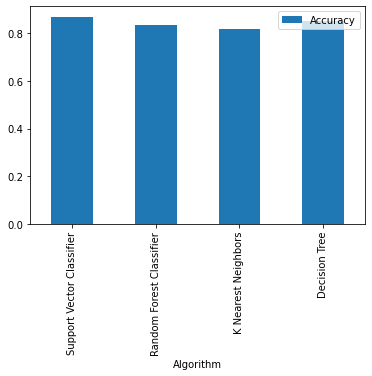

In [27]:
results.plot(kind="bar",x="Algorithm",y="Accuracy")
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig6.png')
plt.show()

SVC IS BEST

In [28]:
#SVC 
param_grid = {'algo__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'algo__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'algo__kernel':['linear']
             }
grid, X_test, y_test = ML_pipeline(X,y,42,3,param_grid,SVC(random_state=42+best_random[0],probability=True))

np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
print('std',np.std(test_score))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

Fitting 3 folds for each of 49 candidates, totalling 147 fits
Best Train Score: 
0.8059670781893004
Best Test Score: 
0.8688524590163934
Best model parameters: 
{'algo__C': 1, 'algo__gamma': 0.001, 'algo__kernel': 'linear'}
test score =  0.8688524590163934
test baseline =  0.47540983606557374
std 0.0
shuffling age
   shuffled test score: 0.869 +/- 0.0
shuffling sex
   shuffled test score: 0.846 +/- 0.008
shuffling cp
   shuffled test score: 0.797 +/- 0.031
shuffling trestbps
   shuffled test score: 0.869 +/- 0.015
shuffling chol
   shuffled test score: 0.869 +/- 0.0
shuffling fbs
   shuffled test score: 0.869 +/- 0.0
shuffling restecg
   shuffled test score: 0.88 +/- 0.008
shuffling thalach
   shuffled test score: 0.839 +/- 0.014
shuffling exang
   shuffled test score: 0.861 +/- 0.017
shuffling oldpeak
   shuffled test score: 0.843 +/- 0.027
shuffling slope
   shuffled test score: 0.862 +/- 0.015
shuffling ca
   shuffled test score: 0.808 +/- 0.029
shuffling thal
   shuffled test score

test score: 0.8688524590163934


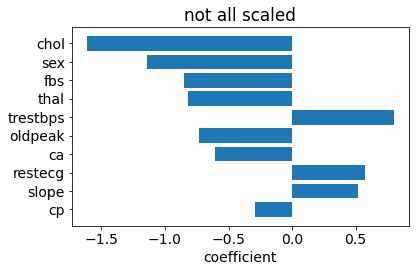

In [29]:
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('not all scaled')
plt.tight_layout()
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig7.png')
plt.show()

test score: 0.8688524590163934


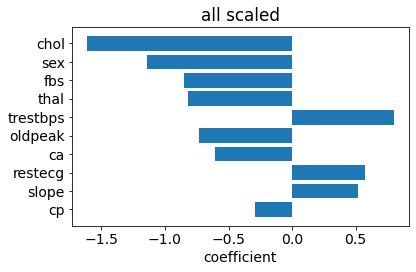

In [30]:
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_["algo"].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled')
plt.tight_layout()
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig8.png')
plt.show()

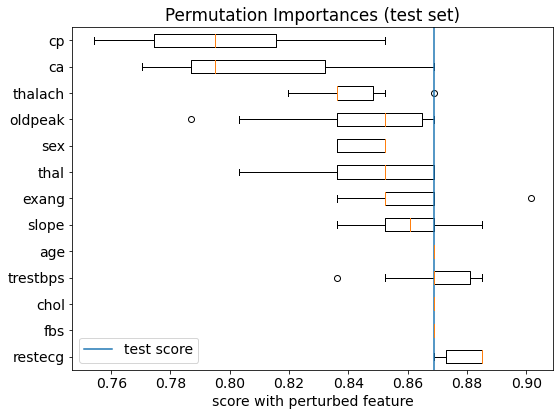

In [31]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('/Users/yashbafna/Desktop/Brown Coursework/DATA1030/DATA1030_HeartDiseasePrediction/Figures/Fig9.png')
plt.show()

In [32]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict_proba,grid.best_estimator_[0].transform(X[:100]))
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(61, 13)


  0%|          | 0/61 [00:00<?, ?it/s]

(2, 61, 13)


In [33]:
shap_values[0][0]

array([-0.00279602,  0.05024385,  0.00420603,  0.06996107, -0.00300128,
        0.06626741,  0.17190616,  0.00796201,  0.02698949,  0.12967983,
        0.06440844,  0.08827181, -0.17514467])

In [34]:
index = 42 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)


0.23829823753050486


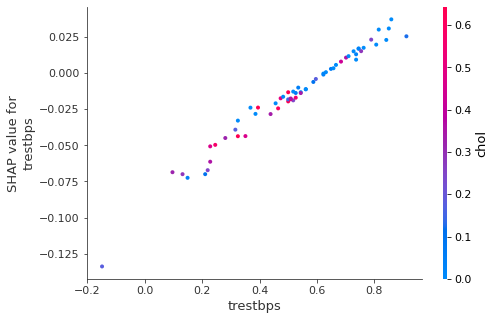

In [35]:
ftr = 'trestbps'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed[:1000], feature_names=feature_names)


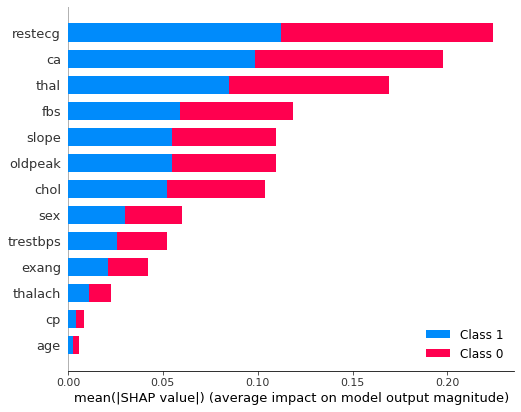

In [36]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names)
